<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/NLP/blob/main/Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


# Get helper functions

In [4]:
!wget https://raw.githubusercontent.com/Prashanna-Raj-Pandit/Transfer-Learning--TensorFlow/refs/heads/main/helper_functions.py

--2025-05-20 19:32:01--  https://raw.githubusercontent.com/Prashanna-Raj-Pandit/Transfer-Learning--TensorFlow/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10129 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.89K  --.-KB/s    in 0s      

2025-05-20 19:32:01 (80.5 MB/s) - ‘helper_functions.py’ saved [10129/10129]



In [5]:
from helper_functions import unzip_data, create_tensorboard_callback,plot_loss_curves, compare_historys

## Get a text dataset

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip")

--2025-05-20 19:32:02--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2025-05-20 19:32:02 (84.0 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing data
with the help of pandas


In [7]:
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# suffling train data
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [10]:
# how many samples?
len(train_df),len(test_df)

(7613, 3263)

In [11]:
# Lets visualize some random samples.
import random
random_index=random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"Target:{target}","real disaster" if target>0 else "not real disaster")
  print(f"Text: {text}")
  print("_____")

Target:0 not real disaster
Text: I wrecked my stomach help
_____
Target:1 real disaster
Text: @guardian Has Japan ever truly come to terms with devastation and mass murder of millions of Chinese and others with traditional weapons?
_____
Target:0 not real disaster
Text: New post from @SeismicSoftware: 3 Major Challenges of Channel Sales Enablement http://t.co/kWMRCEkVTF
_____
Target:1 real disaster
Text: Russia destroys food while people go hungry.  We're not the only ones with an insane government.
http://t.co/ZonNqGsxYw
_____
Target:1 real disaster
Text: Civilian casualties rise as Afghan war intensifies in 2015-- http://t.co/NnylXhInPx
_____


In [12]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


## split data in to training and validation set

In [13]:
from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                       train_df_shuffled["target"].to_numpy(),
                                                                       test_size=0.1, # use 10% of training data for validation
                                                                       random_state=42)

In [14]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [15]:
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Text vectorizarion (Tokenization)
### Converting text into numbers

*   Tokenization: Tokenization is the process of breaking down text into smaller units called tokens, which can be words, subwords, or even characters. Its a direct mapping of token to a number
*   Embedding: Create a matrix of feature vector for each token.
Embeddings convert tokens (words/subwords) into numerical vectors so that machines can process them. They capture semantic meaning (e.g., "king" is closer to "queen" than to "apple").Contextual Embeddings (Modern NLP)

Words get different vectors based on context (e.g., BERT, GPT).



In [16]:
import tensorflow as tf
text_vectorizer=tf.keras.layers.TextVectorization(max_tokens=None,
                                                  standardize='lower_and_strip_punctuation',
                                                  split='whitespace',
                                                  ngrams=None, #create groups of n-words
                                                  output_mode='int',
                                                  output_sequence_length=None, # how long do u want your sequence to be?
                                                  pad_to_max_tokens=False
                                                  )


### find the average number of tokens or words in training samples

In [17]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [18]:
# setup text vectorization variables
max_vocab_length=10000 # Maximum number of words to have in our vocabolary
max_length=15 #max length our sentences will be
text_vectorizer=tf.keras.layers.TextVectorization(max_tokens=max_vocab_length,
                                                  output_mode='int',
                                                  output_sequence_length=max_length)

In [19]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [20]:
# lets create a sample sentences and tokenize it
sample_sentence="The recent earthquake has destroyed the entire city"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   2, 2756,  290,   41,  351,    2,  855,  182,    0,    0,    0,
           0,    0,    0,    0]])>

In [21]:
# selecting a random sample from the train dataset and tokenize it
import random
random_sentence=random.choice(train_sentences)
print(f"Random Sample: {random_sentence}")
print(f"Vectorized sample: {text_vectorizer([random_sentence])}")

Random Sample: #kick #hurricane Seriously #simple websites: http://t.co/x8W7tF6FHg Looking For A Seriously Simple Program To http://t.co/9NZ9zFM93i
Vectorized sample: [[1651  346 2303 1591 6868    1  884   10    3 2303 1591 1377    5    1
     0]]


In [22]:
# Get the unique words in the vocabulary
words_in_vocab=text_vectorizer.get_vocabulary() # Get all the unique words in the training dataset
top_5_words=words_in_vocab[:5] # get the top 5 most common words
bottom_5_words=words_in_vocab[-5:] # get the least 5 common words
print(f"Words in Vocab: {len(words_in_vocab)}")
print(f"Top 5 words: {top_5_words}")
print(f"Least 5 words: {bottom_5_words}")

Words in Vocab: 10000
Top 5 words: ['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]
Least 5 words: [np.str_('pages'), np.str_('paeds'), np.str_('pads'), np.str_('padres'), np.str_('paddytomlinson1')]


### creating an Embedding using Embedding layer

*   input_dim=the size of our vocabolary
*   output_dim= the size of the output embedding vector
*   input_length= size of the sequences being passed to the embedding layer

Key Properties of an Embedding Layer

**Trainable:**

* The vectors are updated via backpropagation (like other weights in a neural network).

* Pretrained embeddings (e.g., GloVe) can also be fine-tuned.

**Efficiency:**
More efficient than one-hot encoding + dense layers (avokes high-dimensional sparse matrices).

**Interpretability:**
Learned embeddings often capture semantic relationships (e.g., similar words cluster together).


In [23]:
from tensorflow.keras import layers
embedding=layers.Embedding(input_dim=max_vocab_length, # set input shape
                           output_dim=128, # output shape
                           input_length=max_length # how long is each input
                           )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
# embed the random sample. i.e turn into dense vector of fixed size
print("Random sample: ",random_sentence)
print("After Embedding:...................")
sample_embed=embedding(text_vectorizer([random_sentence]))
sample_embed

Random sample:  #kick #hurricane Seriously #simple websites: http://t.co/x8W7tF6FHg Looking For A Seriously Simple Program To http://t.co/9NZ9zFM93i
After Embedding:...................


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00809454,  0.03589184,  0.0235444 , ..., -0.04342625,
          0.01367653,  0.01552181],
        [-0.01722772, -0.04394913, -0.01220664, ..., -0.04826998,
         -0.01256342, -0.02478188],
        [-0.02113581,  0.02355028, -0.04471048, ..., -0.03554672,
          0.01038539, -0.0015035 ],
        ...,
        [ 0.02795402, -0.00621603,  0.02632929, ..., -0.02105063,
         -0.04104483,  0.0031432 ],
        [-0.00494503, -0.00583082,  0.04438216, ...,  0.02377388,
          0.04861449,  0.02894728],
        [ 0.02249883,  0.04718337, -0.03257458, ...,  0.03685902,
          0.03808853, -0.0387546 ]]], dtype=float32)>

In [25]:
# checkout single token embedding
sample_embed[0][0],sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.00809454,  0.03589184,  0.0235444 , -0.03337052, -0.00980736,
        -0.03082216, -0.04725276, -0.03211149,  0.04152875,  0.01222207,
         0.04974918, -0.0295202 ,  0.04373309,  0.02880282, -0.03045427,
        -0.0489752 ,  0.03689094, -0.02561894, -0.01838213, -0.03106923,
         0.01263756,  0.0298279 ,  0.0360341 , -0.03012498, -0.01807324,
        -0.02029662, -0.01404157,  0.0067265 , -0.00192659, -0.02817324,
        -0.025946  ,  0.02871484,  0.00147942, -0.01466971, -0.0162891 ,
         0.0357949 ,  0.0269666 , -0.00677817,  0.00253017, -0.04155427,
         0.0204018 , -0.02847568, -0.03929566, -0.03435588, -0.03368249,
         0.01220369,  0.03289472,  0.0470219 , -0.00274945,  0.00445298,
        -0.01503064, -0.02788728, -0.01744394,  0.00972375, -0.00183793,
         0.01172332,  0.02872297,  0.00455928, -0.02054886, -0.02616043,
        -0.00592437,  0.04272424,  0.00956203,  0.04041349, -0.02518323,
  

This is the embedding for the first word of sentence

# Model 0: creating a baseline
To create baseline, let's use Sklearn Multimodal Naive Bayes using TF-IDF formula to convert text into numbers.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# create tokenization and modeling pipeline
model_0=Pipeline([ # pipeline is like keras Sequantial here
    ('tfidf',TfidfVectorizer()), # convert words into numbers using tfidf
    ('clf',MultinomialNB()), #model the text
])
# Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

## Evaluate baseline model

In [27]:
baseline_accuracy=model_0.score(val_sentences,val_labels)
print(f"Model 0 (Baseline) Accuracy: {baseline_accuracy*100:.3f} %")

Model 0 (Baseline) Accuracy: 79.265 %


In [28]:
baseline_preds=model_0.predict(val_sentences)
print("Predicted labels")
baseline_preds[:20]

Predicted labels


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [29]:
print("Actual labels")
val_labels[:20]

Actual labels


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [30]:
def evaluate_model(model,true_labels,predicted_labels):
  precision=tf.keras.metrics.Precision()
  precision.update_state(true_labels,predicted_labels)
  recall=tf.keras.metrics.Recall()
  recall.update_state(true_labels,predicted_labels)
  f1=(2*(precision.result()*recall.result()))/(precision.result()+recall.result())
  print(f"Precision: {precision.result()*100:.2f}%")
  print(f"Recall: {recall.result()*100:.2f}%")
  print(f"F1 score: {f1*100:.2f}%")

evaluate_model(model_0,val_labels,baseline_preds)



Precision: 88.62%
Recall: 62.64%
F1 score: 73.40%


In [31]:
# from sk-learn
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_performance_metrics(true_labels,predicted_labels):
  accuracy=accuracy_score(true_labels,predicted_labels)
  precision_score,recall_score,f1_score,_=precision_recall_fscore_support(true_labels,predicted_labels,average="weighted")
  model_results={
      "accuracy":accuracy,
      "precision":precision_score,
      "recall":recall_score,
      "f1_score":f1_score
  }
  return model_results

In [32]:
model_0_performance=calculate_performance_metrics(val_labels,baseline_preds)
model_0_performance

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

The two evaluation methods (evaluate_model and calculate_performance_metrics) produce different results because:
* Different Libraries & Implementations

tf.keras.metrics (TensorFlow) and sklearn.metrics (scikit-learn) compute metrics differently.

Example:

>tf.keras.metrics.Precision() uses micro-averaging by default.

>sklearn.metrics.precision_recall_fscore_support() uses weighted averaging (as specified by average="weighted").
Averaging Method

* Weighted vs. Micro Averaging:

>Weighted (scikit-learn): Accounts for class imbalance by weighting metrics by class support.

>Micro (TensorFlow): Aggregates all classes equally, which can skew results if classes are imbalanced.

# Model 1: Simple dense model

In [33]:
# Create a tensorboard callback
from helper_functions import create_tensorboard_callback
# create a directory to save the tensorboard logs
SAVE_DIR="mdoel_logs"

In [34]:
# Building a model with functional API
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string") # inputs are one dimentional string
x=text_vectorizer(inputs) # turn input text into number
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x) # lower the dimentionality of the embedding
outputs=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")

In [35]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_history=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                          callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_1_dense")])


Saving TensorBoard log files to: mdoel_logs/model_1_dense/20250520-193204
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6490 - loss: 0.6497 - val_accuracy: 0.7480 - val_loss: 0.5374
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8061 - loss: 0.4687 - val_accuracy: 0.7808 - val_loss: 0.4785
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8584 - loss: 0.3516 - val_accuracy: 0.7874 - val_loss: 0.4646
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8852 - loss: 0.2903 - val_accuracy: 0.7900 - val_loss: 0.4627
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9123 - loss: 0.2370 - val_accuracy: 0.7874 - val_loss: 0.4780


In [37]:
model_1.evaluate(val_sentences,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7805 - loss: 0.5130


[0.47796186804771423, 0.787401556968689]

In [38]:
# make predictions
model_1_pred_probability=model_1.predict(val_sentences)
model_1_pred_probability.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


(762, 1)

In [39]:
model_1_pred_probability[0]

array([0.41327283], dtype=float32)

In [40]:
model_1_pred_probability=tf.squeeze(tf.round(model_1_pred_probability))
model_1_pred_probability[:50]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)>

In [41]:
val_labels[:50]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0])

In [42]:
model_1_perfornamce=calculate_performance_metrics(true_labels=val_labels,predicted_labels=model_1_pred_probability)
model_1_perfornamce

{'accuracy': 0.7874015748031497,
 'precision': 0.7932296029485675,
 'recall': 0.7874015748031497,
 'f1_score': 0.7841130596930418}

In [43]:
# compare with the baseline
model_0_performance

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

Here, Our base line model outperforms the Deep Learning Model 1

# Visualizing embedding layer

In [44]:
len(words_in_vocab), words_in_vocab[:10] # the most common words

(10000,
 ['',
  '[UNK]',
  np.str_('the'),
  np.str_('a'),
  np.str_('in'),
  np.str_('to'),
  np.str_('of'),
  np.str_('and'),
  np.str_('i'),
  np.str_('is')])

In [45]:
# get the weight matrix of embedding layer
embeded_weights=model_1.get_layer("embedding").get_weights()[0]
embeded_weights

array([[ 0.04424737,  0.02038503, -0.0495697 , ...,  0.06279384,
         0.06658477, -0.01042581],
       [ 0.00271836, -0.0148603 ,  0.03855231, ...,  0.03342576,
         0.05980499,  0.03885246],
       [-0.00326718, -0.01928389,  0.01815896, ..., -0.02156123,
         0.01623636, -0.00148336],
       ...,
       [ 0.0309254 , -0.03597227, -0.0061096 , ...,  0.01050769,
        -0.04153617,  0.03565073],
       [ 0.0644257 , -0.0086603 , -0.08586557, ...,  0.03273141,
        -0.0119947 ,  0.07575957],
       [ 0.07241717, -0.0530818 , -0.04966618, ...,  0.07150057,
         0.07927046,  0.0517734 ]], dtype=float32)

In [46]:
embeded_weights.shape

(10000, 128)

## Embedding Projector

In [47]:
# Write the weights to disk. To use the Embedding Projector, you will upload two files in tab separated format:
# a file of vectors (containing the embedding), and a file of meta data (containing the words).
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embeded_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [48]:
# If you are running this tutorial in Colaboratory, you can use the following snippet to download these files to your local machine
#  (or use the file browser, View -> Table of contents -> File browser).
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model: 2
LSTM : Long short term memory
> Input->Tokenizer->Embeddings->Layers(RNN/Dense)->Output(label probability)

In [49]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),name="input_layer",dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
print(x.shape)
# x=layers.LSTM(units=64,return_sequences=True)(x) # when we are stacking the LSTM cells we need to set the return_sequences= true
print(x.shape)
x=layers.LSTM(64)(x)
print(x.shape)
# x=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)

model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 128)
(None, 15, 128)
(None, 64)


In [50]:
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# compile the mdoel
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [52]:
# fit the model
model_2_history=model_2.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_2_lstm")])

Saving TensorBoard log files to: mdoel_logs/model_2_lstm/20250520-193233
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8798 - loss: 0.2978 - val_accuracy: 0.7808 - val_loss: 0.5569
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9399 - loss: 0.1611 - val_accuracy: 0.7887 - val_loss: 0.5655
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9541 - loss: 0.1258 - val_accuracy: 0.7795 - val_loss: 0.6384
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9595 - loss: 0.1048 - val_accuracy: 0.7808 - val_loss: 0.7500
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9693 - loss: 0.0804 - val_accuracy: 0.7717 - val_loss: 0.8201


In [53]:
# make prediction
model_2_pred=model_2.predict(val_sentences)
model_2_pred[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


array([[2.1731870e-02],
       [8.4591216e-01],
       [9.9955380e-01],
       [3.7855435e-02],
       [8.4637367e-04],
       [9.9286968e-01],
       [6.3132918e-01],
       [9.9958909e-01],
       [9.9939632e-01],
       [3.4285539e-01]], dtype=float32)

In [54]:
model_2_pred_probability=tf.squeeze(tf.round(model_2_pred))
model_2_pred_probability[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

## Model 2 vs Model 1 vs Model 0

Still our baseline beats our Model 1 and Model 2

In [55]:
model_2_performance=calculate_performance_metrics(true_labels=val_labels,predicted_labels=model_2_pred_probability)
model_2_performance

{'accuracy': 0.7716535433070866,
 'precision': 0.7751367943413853,
 'recall': 0.7716535433070866,
 'f1_score': 0.7687482528669142}

In [56]:
model_1_perfornamce

{'accuracy': 0.7874015748031497,
 'precision': 0.7932296029485675,
 'recall': 0.7874015748031497,
 'f1_score': 0.7841130596930418}

In [57]:
model_0_performance

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

# Model 3: GRU
The GRU cell has similar features to an LSTM but has less parameters

In [58]:
# Build an RNN using GRU cell
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GRU(64)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [59]:
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3_history=model_3.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_3_GRU")])

Saving TensorBoard log files to: mdoel_logs/model_3_GRU/20250520-193305
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8718 - loss: 0.2794 - val_accuracy: 0.7795 - val_loss: 0.6723
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9670 - loss: 0.0869 - val_accuracy: 0.7795 - val_loss: 0.8093
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9730 - loss: 0.0674 - val_accuracy: 0.7717 - val_loss: 0.8847
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9742 - loss: 0.0624 - val_accuracy: 0.7808 - val_loss: 1.0731
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9780 - loss: 0.0510 - val_accuracy: 0.7769 - val_loss: 1.3144


In [61]:
model_3_pred=model_3.predict(val_sentences)
model_3_pred[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[2.9512870e-04],
       [9.3158084e-01],
       [9.9992198e-01],
       [7.4899577e-02],
       [5.8203841e-05],
       [9.9984878e-01],
       [9.6911252e-01],
       [9.9995983e-01],
       [9.9992597e-01],
       [9.2412829e-01]], dtype=float32)

In [62]:
model_3_pred_probability=tf.squeeze(tf.round(model_3_pred))
model_3_pred_probability[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [63]:
model_3_performance=calculate_performance_metrics(true_labels=val_labels,predicted_labels=model_3_pred_probability)
model_3_performance

{'accuracy': 0.7769028871391076,
 'precision': 0.7789562668302826,
 'recall': 0.7769028871391076,
 'f1_score': 0.7747522807746444}

In [64]:
model_0_performance

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

# Model 4

Normal RNN's go from the left to right but a bidirectional RNN's goes from the left to right as well as right to left.

In [65]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
# x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_bidirectional")


In [66]:
# summary
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [68]:
# fit the model
model_4_history=model_4.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model 4 bidirectional")])

Saving TensorBoard log files to: mdoel_logs/model 4 bidirectional/20250520-193347
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9590 - loss: 0.1889 - val_accuracy: 0.7743 - val_loss: 0.8878
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9764 - loss: 0.0505 - val_accuracy: 0.7677 - val_loss: 1.2843
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9824 - loss: 0.0380 - val_accuracy: 0.7743 - val_loss: 1.2118
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9807 - loss: 0.0411 - val_accuracy: 0.7769 - val_loss: 1.2366
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9770 - loss: 0.0435 - val_accuracy: 0.7743 - val_loss: 1.3478


In [69]:
#make prediction on bodirectional RNN
model_4_pred=model_4.predict(val_sentences)
model_4_pred[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


array([[1.5416143e-03],
       [9.7927666e-01],
       [9.9998963e-01],
       [2.7601489e-01],
       [6.3214611e-05],
       [9.9953735e-01],
       [9.9781221e-01],
       [9.9999279e-01],
       [9.9998426e-01],
       [5.5679107e-01]], dtype=float32)

In [70]:
# converting pred prob to the pred labels
model_4_preds=tf.squeeze(tf.round(model_4_pred))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [71]:
# calculating the metrics
model_4_performance=calculate_performance_metrics(true_labels=val_labels,predicted_labels=model_4_preds)
model_4_performance

{'accuracy': 0.7742782152230971,
 'precision': 0.7757380419380466,
 'recall': 0.7742782152230971,
 'f1_score': 0.7723566516531356}

# CNN for the text.
we have used CNN for the images which is 2D but our text data is 1D

Inputs-> Tokenozation-> Embedding-> layer(s) (typically conv1D or pooling layers) -> outputs (class probalilities)

# Model 5 : Conv1D

In [72]:
from tensorflow.keras import layers
embedding_test=embedding(text_vectorizer(["hi there, how are you"]))
conv1d=layers.Conv1D(filters=32,kernel_size=5,padding="valid",activation="relu")
conv1d_output=conv1d(embedding_test)
max_pool=layers.GlobalAveragePooling1D()
max_pool_output=max_pool(conv1d_output)
max_pool_output=max_pool(conv1d_output)
embedding_test.shape,conv1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [73]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02365052, -0.02441151,  0.12718922, ...,  0.07058867,
          0.02305833, -0.00289622],
        [ 0.07264792, -0.02267214, -0.07543124, ...,  0.08358353,
          0.04432443,  0.03017477],
        [ 0.08664461, -0.05670885, -0.0260117 , ...,  0.01376444,
          0.05258575,  0.05578537],
        ...,
        [-0.00954069,  0.01177143, -0.08076371, ...,  0.00971368,
          0.03931649, -0.02085449],
        [-0.00954069,  0.01177143, -0.08076371, ...,  0.00971368,
          0.03931649, -0.02085449],
        [-0.00954069,  0.01177143, -0.08076371, ...,  0.00971368,
          0.03931649, -0.02085449]]], dtype=float32)>

In [74]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name='model_5_conv1d')
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_5.summary()

Model: "model_5_conv1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 11, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321,089 (5.04 MB)

 Trainable params: 1,321,089 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model_5_history= model_5.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences,val_labels),
                             callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="Conv1D")]
                            )

Saving TensorBoard log files to: mdoel_logs/Conv1D/20250520-193438
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9411 - loss: 0.1802 - val_accuracy: 0.7651 - val_loss: 0.9253
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9769 - loss: 0.0700 - val_accuracy: 0.7677 - val_loss: 0.9945
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9798 - loss: 0.0557 - val_accuracy: 0.7585 - val_loss: 1.0648
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9783 - loss: 0.0530 - val_accuracy: 0.7559 - val_loss: 1.2079
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9787 - loss: 0.0483 - val_accuracy: 0.7625 - val_loss: 1.2617


In [76]:
model_5_pred=model_5.predict(val_sentences)
model_5_pred[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[2.0453711e-01],
       [9.4235808e-01],
       [9.9995565e-01],
       [4.1775800e-02],
       [1.5354911e-07],
       [9.9686372e-01],
       [9.6559221e-01],
       [9.9997616e-01],
       [9.9999893e-01],
       [6.3018113e-01]], dtype=float32)

In [77]:
model_5_pred_probability=tf.squeeze(tf.round(model_5_pred))
model_5_pred_probability[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [78]:
model_5_performance=calculate_performance_metrics(val_labels,model_5_pred_probability)
model_5_performance


{'accuracy': 0.7624671916010499,
 'precision': 0.7654290603522874,
 'recall': 0.7624671916010499,
 'f1_score': 0.7595223669373627}

In [79]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE") #Universal sentense encoder

In [80]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, Model

# Wrap USE inside a custom Keras Layer
class USEEmbedding(tf.keras.layers.Layer):
    def __init__(self, trainable=False, **kwargs):
        super(USEEmbedding, self).__init__(trainable=trainable, **kwargs)
        self.use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

    def call(self, inputs):
        return self.use(inputs)

# Keras Input (1D: batch of strings)
input_text = tf.keras.Input(shape=(), dtype=tf.string, name="input_text")

# Embed using our wrapped USE Layer
embedding = USEEmbedding()(input_text)

# Add classification layers
x = layers.Dense(64, activation="relu")(embedding)
output = layers.Dense(1, activation="sigmoid")(x)

# Build model
model_6 = Model(inputs=input_text, outputs=output)
model_6.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Show model summary
model_6.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_text (InputLayer)         │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ use_embedding_1 (USEEmbedding)  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,897 (128.50 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
mdoel_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_6_transfer_learning")])

Saving TensorBoard log files to: mdoel_logs/model_6_transfer_learning/20250520-193530
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7449 - loss: 0.5768 - val_accuracy: 0.7966 - val_loss: 0.4469
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8051 - loss: 0.4272 - val_accuracy: 0.8031 - val_loss: 0.4380
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8235 - loss: 0.3896 - val_accuracy: 0.8097 - val_loss: 0.4319
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8290 - loss: 0.3853 - val_accuracy: 0.8097 - val_loss: 0.4278
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8331 - loss: 0.3850 - val_accuracy: 0.8163 - val_loss: 0.4255


In [98]:
# make prediction
model_6_pred=model_6.predict(val_sentences)
model_6_pred[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


array([[0.16600828],
       [0.800241  ],
       [0.9906016 ],
       [0.21435733],
       [0.7578174 ],
       [0.7343292 ],
       [0.98552084],
       [0.9808493 ],
       [0.94341975],
       [0.09100382]], dtype=float32)

In [83]:
# convrting the preds into probabilities
model_6_pred_probability=tf.squeeze(tf.round(model_6_pred))
model_6_pred_probability[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [84]:
model_6_results=calculate_performance_metrics(true_labels=val_labels,predicted_labels=model_6_pred_probability)
model_6_results

{'accuracy': 0.8162729658792651,
 'precision': 0.8187546712946793,
 'recall': 0.8162729658792651,
 'f1_score': 0.8147089025083661}

Model 7: Transfer learning

In [85]:
import numpy as np
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

To make sure we're making an appropriate comparison between our model's ability to learn from the full training set and 10% subset, we'll clone our USE model (model_6) using the tf.keras.models.clone_model() method.

Doing this will create the same architecture but reset the learned weights of the clone target (pretrained weights from the USE will remain but all others will be reset).

In [86]:
model_7=tf.keras.models.clone_model(model_6)
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_7.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_text (InputLayer)         │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ use_embedding_1 (USEEmbedding)  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,897 (128.50 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: mdoel_logs/10_percent_tf_hub_sentence_encoder/20250520-193602
Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6255 - loss: 0.6769 - val_accuracy: 0.7047 - val_loss: 0.6428
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8088 - loss: 0.6009 - val_accuracy: 0.7507 - val_loss: 0.5826
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8265 - loss: 0.5186 - val_accuracy: 0.7677 - val_loss: 0.5328
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8207 - loss: 0.4588 - val_accuracy: 0.7769 - val_loss: 0.5023
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8528 - loss: 0.4142 - val_accuracy: 0.7756 - val_loss: 0.4884


In [88]:
model_7_preds=model_7.predict(val_sentences)
model_7_preds[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


array([[0.24090564],
       [0.8025458 ],
       [0.89704573],
       [0.3020524 ],
       [0.5447828 ],
       [0.8212297 ],
       [0.80408126],
       [0.84819096],
       [0.83718824],
       [0.13661332]], dtype=float32)

In [89]:
model_7_preds_probalility=tf.squeeze(tf.round(model_7_preds))
model_7_preds_probalility[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1.], dtype=float32)>

In [90]:
model_7_results=calculate_performance_metrics(val_labels,model_7_preds_probalility)
model_7_results

{'accuracy': 0.7755905511811023,
 'precision': 0.7797991425654591,
 'recall': 0.7755905511811023,
 'f1_score': 0.7725109164504043}

# compare all the models

In [91]:
all_models=pd.DataFrame({
    "baseline":model_0_performance,
    "simple_dense":model_1_perfornamce,
    "LSTM":model_2_performance,
    "GRU":model_3_performance,
    "bidirectional":model_4_performance,
    "Conv1D":model_5_performance,
    "USE":model_6_results,
    "10% TL":model_7_results

})
all_models=all_models.transpose()
all_models

,accuracy,precision,recall,f1_score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.793230,0.787402,0.784113
LSTM,0.771654,0.775137,0.771654,0.768748
GRU,0.776903,0.778956,0.776903,0.774752
bidirectional,0.774278,0.775738,0.774278,0.772357
Conv1D,0.762467,0.765429,0.762467,0.759522
USE,0.816273,0.818755,0.816273,0.814709
10% TL,0.775591,0.779799,0.775591,0.772511


<Axes: >

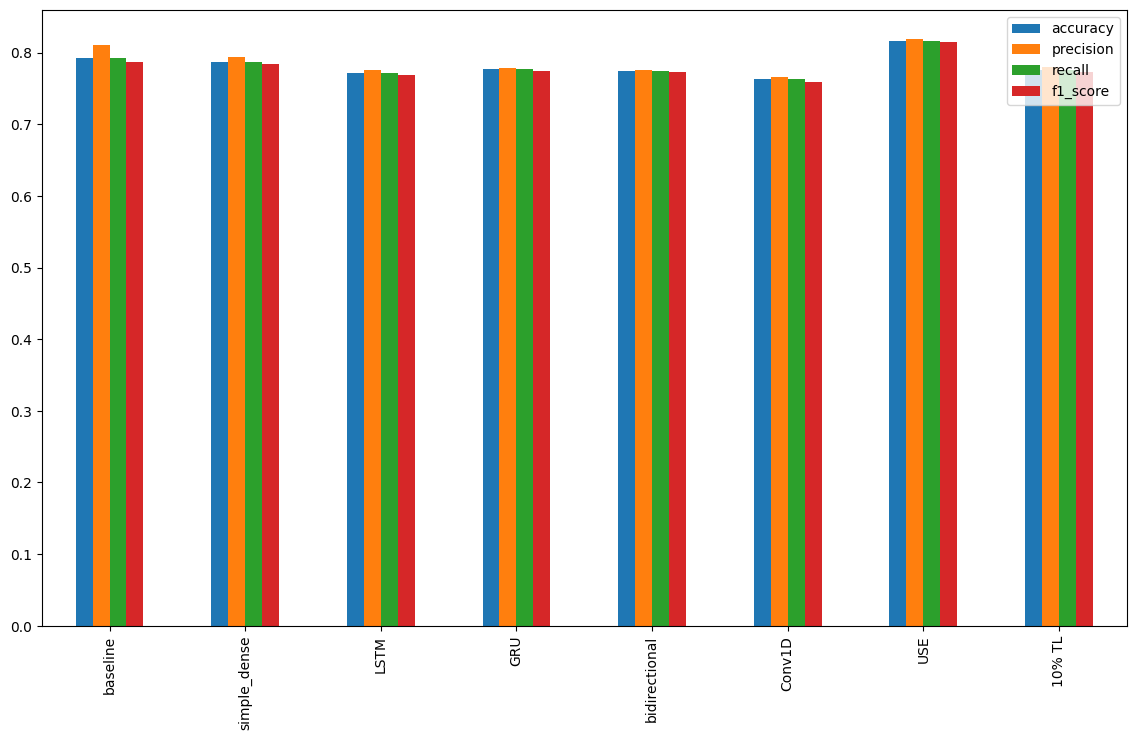

In [92]:
all_models.plot(kind="bar",figsize=(14,8))

<Axes: >

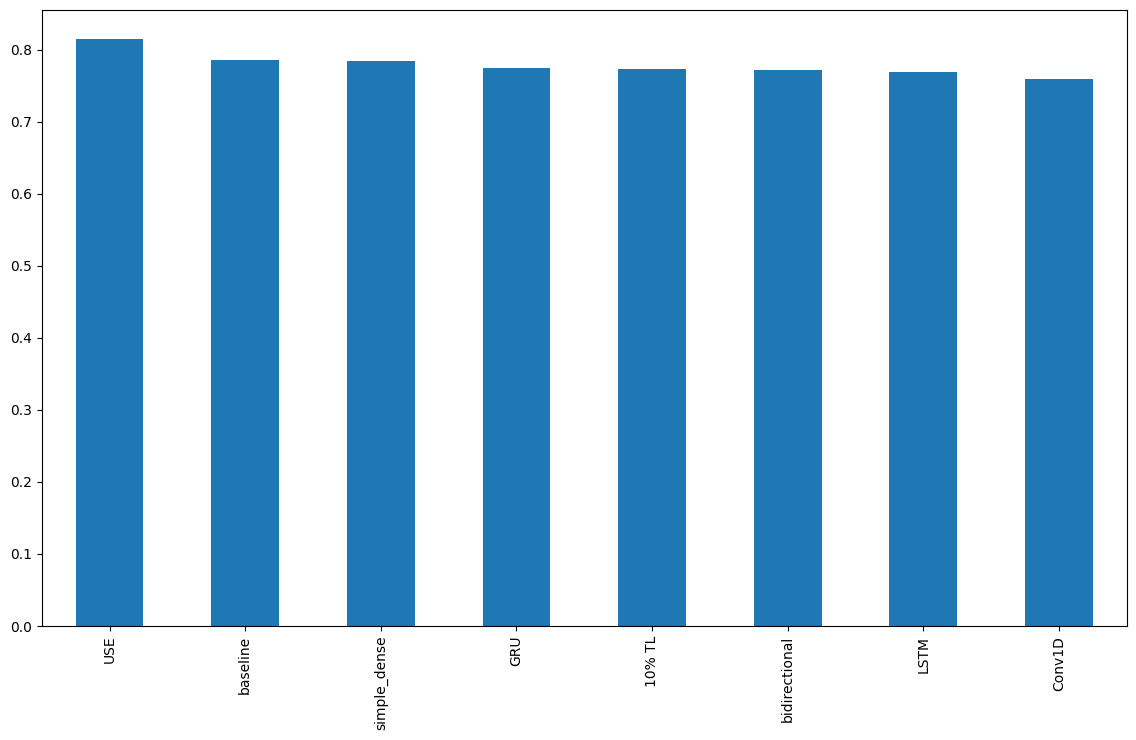

In [93]:
# sort the results based on the f1 score
all_models.sort_values("f1_score",ascending=False)["f1_score"].plot(kind="bar",figsize=(14,8))

Drilling down into a single metric we see our USE TensorFlow Hub models performing better than all of the other models. Interestingly, the baseline's F1-score isn't too far off the rest of the deeper models.


# Combining Models (Ensembling/Stacking)

In many real-world systems, instead of relying on just one model, multiple different models are combined to make better predictions. This technique is known as model ensembling or stacking.

The main idea is that if several different models (uncorrelated models) agree on a prediction, it's likely to be more reliable than just one model's prediction. These different models may be trained on the same data but use different methods to learn patterns. For example, we could combine our baseline model, a bidirectional LSTM model, and a TensorFlow Hub USE model. Even though they learn from the same data, they process it in different ways.

If we only use similar models, like three LSTMs, they might all make the same mistakes. But using varied models increases the chances of more balanced and accurate predictions. It's like choosing a restaurant with friends: if people with different tastes all agree on the same place, it’s probably a solid choice.

For classification tasks like ours, we can combine models in a few ways:

**Averaging:** Average the prediction probabilities from each model.

**Majority vote:** Take the most common prediction among all models.

**Stacking:** Use the outputs of several models as inputs for another model.

In our case, we’ll combine model_0 (baseline), model_2 (LSTM), and model_6 (USE model) by averaging their prediction probabilities.

In [94]:
#get the mean prediction probaility of three models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred, axis=1) + tf.squeeze(model_6_pred)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [95]:
#calculating results of our combined model
ensemble_results=calculate_performance_metrics(val_labels,combined_preds)
ensemble_results

{'accuracy': 0.8057742782152231,
 'precision': 0.8058234344925942,
 'recall': 0.8057742782152231,
 'f1_score': 0.805117931562447}

In [96]:
# Adding out combined model to the dataframe.
all_models.loc["ensemble"]=ensemble_results
all_models


,accuracy,precision,recall,f1_score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.793230,0.787402,0.784113
LSTM,0.771654,0.775137,0.771654,0.768748
GRU,0.776903,0.778956,0.776903,0.774752
bidirectional,0.774278,0.775738,0.774278,0.772357
Conv1D,0.762467,0.765429,0.762467,0.759522
USE,0.816273,0.818755,0.816273,0.814709
10% TL,0.775591,0.779799,0.775591,0.772511
ensemble,0.805774,0.805823,0.805774,0.805118


# save the model

In [97]:
model_6.save("model_6_TL.h5") # HDF5